In [1]:
import cv2
import numpy as np
import math

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def plot_one_image(image: np.ndarray) -> None:
    """
    Отобразить изображение с помощью matplotlib.
    Вспомогательная функция.
    
    :param image: изображение для отображения
    :return: None
    """
    fig, axs = plt.subplots(1, 1, figsize=(8, 7))
    
    axs.imshow(image)
    #axs.axis('off')
    plt.plot()

In [3]:
# import cv2
# import numpy as np

def find_road_number(image: np.ndarray) -> int:
    road=[]
    last=0
    for i in range(image.shape[1]):
        r=image[0][i][0]
        g=image[0][i][1]
        b=image[0][i][2]
        if (250<=r<=255 and 251<=g<=252 and 120<=b<=121):
            if(i!=0 and i-last>100):
                road.append((last,i))
            last=i
            
    #find cars and blocks
    flags=np.zeros((2, len(road)), bool)
    for i in range(len(road)):
        mid = (road[i][1]-road[i][0])//2 + road[i][0]
        for j in range(image.shape[0]):
            r=image[j][mid][0]
            g=image[j][mid][1]
            b=image[j][mid][2]
            if (250<=r<=255 and 36<=g<=40 and 0<=b<=2): #block
                flags[0][i]=True
            if (47<=r<=50 and 115<=g<=120 and 250<=b<=255): #car
                flags[1][i]=True
    
    #wherer need go
    openl = -1
    for i in range(len(flags[0])):
        if flags[0][i] == False:
            openl=i 
        if flags[0][i] ==True and flags[1][i]==True:
            if openl != -1:
                return openl
            else:
                for j in range(i,len(flags[0])):
                    if flags[0][j] == False:
                        openl=j
                        return openl

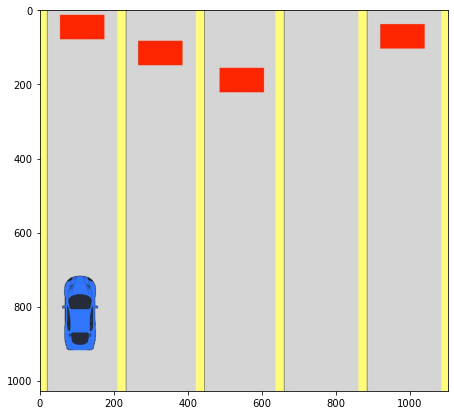

In [6]:
test_image = cv2.imread('C:/Users/User!!!!!!!!/cv_mipt_minor-master/week_01_images/homework/task_2/image_01.jpg')
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
plot_one_image(test_image)

In [7]:
road_number = find_road_number(test_image)
print(f'Нужно перестроиться на дорогу номер {road_number}')

Нужно перестроиться на дорогу номер 3
